In [25]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.cluster import DBSCAN

In [26]:
path = '/Users/selinturkoglu/Desktop/Studium/Semester/8_24-SS/PA/data/toxins.tsv'

In [27]:
df = pd.read_csv(path, sep='\t')
df

,Entry,Entry Name,Protein names,Gene Names,Organism,Domain [FT],Protein families,Sequence similarities,Sequence
0,A0A0B4U9L8,VMF1_VIPAA,Zinc metalloproteinase-disintegrin-like protei...,NaN,Vipera ammodytes ammodytes (Western sand viper),"DOMAIN 202..398; /note=""Peptidase M12B""; /evid...","Venom metalloproteinase (M12B) family, P-III s...",SIMILARITY: Belongs to the venom metalloprotei...,MLQVLLVTICLAVFPYQGSSIILESGNVNDYEVVYPQKLTALLKGA...
1,A0A0B5A8P4,INS3A_CONGE,Con-Ins G3 (Insulin 3) [Cleaved into: Con-Ins ...,NaN,Conus geographus (Geography cone) (Nubecula ge...,NaN,Insulin family,SIMILARITY: Belongs to the insulin family.,MTTSFYFLLVALGLLLYVCQSSFGNQHTRNSDTPKHRCGSELADQY...
2,A0A0B5AC95,INS1A_CONGE,Con-Ins G1a (Insulin 1) [Cleaved into: Con-Ins...,NaN,Conus geographus (Geography cone) (Nubecula ge...,NaN,Insulin family,SIMILARITY: Belongs to the insulin family. {EC...,MTTSSYFLLMALGLLLYVCQSSFGNQHTRTFDTPKHRCGSEITNSY...
3,A0A0D4WV12,BIB11_SICTE,Dermonecrotic toxin StSicTox-betaIB1i (EC 4.6....,NaN,Sicarius terrosus (Cave spider),NaN,"Arthropod phospholipase D family, Class II sub...",SIMILARITY: Belongs to the arthropod phospholi...,GDSRRPIWNIAHMVNDLDLVDEYLDDGANSLELDVEFSKSGTALRT...
4,A0A0N7CSQ4,TX41A_SCOMU,Tau-scoloptoxin(04)-Sm1b (Tau-SLPTX(04)-Sm1b) ...,NaN,Scolopendra mutilans (Chinese red-headed centi...,NaN,Scoloptoxin-04 family,SIMILARITY: Belongs to the scoloptoxin-04 fami...,MLKSFCILSVFMVLFLAKFPDLCSGEEISPLKIVVRNSEYLNNPCN...
...,...,...,...,...,...,...,...,...,...
5250,P0CI16,TE61_HASHE,Augerpeptide hhe6.1,NaN,Hastula hectica (Sea snail) (Impages hectica),NaN,NaN,NaN,GMGIGINLPPCIKNGEYCNPWTGSIILGGACCGTCTDYECH
5251,P0CI17,TE62_HASHE,Augerpeptide hhe6.2,NaN,Hastula hectica (Sea snail) (Impages hectica),NaN,NaN,NaN,ALPCPYGCPLRCCHMTDGVCLRNKQGC
5252,P0CI18,TE63_HASHE,Augerpeptide hhe6.3,NaN,Hastula hectica (Sea snail) (Impages hectica),NaN,NaN,NaN,VLFTPPELLGCGNRCSDDCCKWGRCQPGCTD
5253,P0CI19,TE64_HASHE,Augerpeptide hhe6.4,NaN,Hastula hectica (Sea snail) (Impages hectica),NaN,NaN,NaN,SSLHCGDDPWCPTGCCENEDCDIGCKRDWEKSRSQP


In [28]:
#df.to_json('poison.json')
#json = pd.read_json('/Users/selinturkoglu/PycharmProjects/pa/poison.json')

In [29]:
scatter_path = '/Users/selinturkoglu/Desktop/Studium/Semester/8_24-SS/PA/clans_out.tsv'
scatter = pd.read_csv(scatter_path, sep='\t')
scatter

,ID,NAME,X,Y
0,0,sp|A0A0B4U9L8|VMF1_VIPAA Zinc metalloproteinas...,0.215006,0.719284
1,1,sp|A0A0B5A8P4|INS3A_CONGE Con-Ins G3 OS=Conus ...,0.471781,0.804368
2,2,sp|A0A0B5AC95|INS1A_CONGE Con-Ins G1a OS=Conus...,0.471446,0.809471
3,3,sp|A0A0D4WV12|BIB11_SICTE Dermonecrotic toxin ...,0.082629,0.644929
4,4,sp|A0A0N7CSQ4|TX41A_SCOMU Tau-scoloptoxin(04)-...,0.123150,0.701138
...,...,...,...,...
5250,5250,sp|P0CI16|TE61_HASHE Augerpeptide hhe6.1 OS=Ha...,0.945380,0.453934
5251,5251,sp|P0CI17|TE62_HASHE Augerpeptide hhe6.2 OS=Ha...,0.422708,0.038988
5252,5252,sp|P0CI18|TE63_HASHE Augerpeptide hhe6.3 OS=Ha...,0.003607,0.602928
5253,5253,sp|P0CI19|TE64_HASHE Augerpeptide hhe6.4 OS=Ha...,0.048968,0.425110


In [30]:
x = np.array(scatter.X)
y = np.array(scatter.Y)

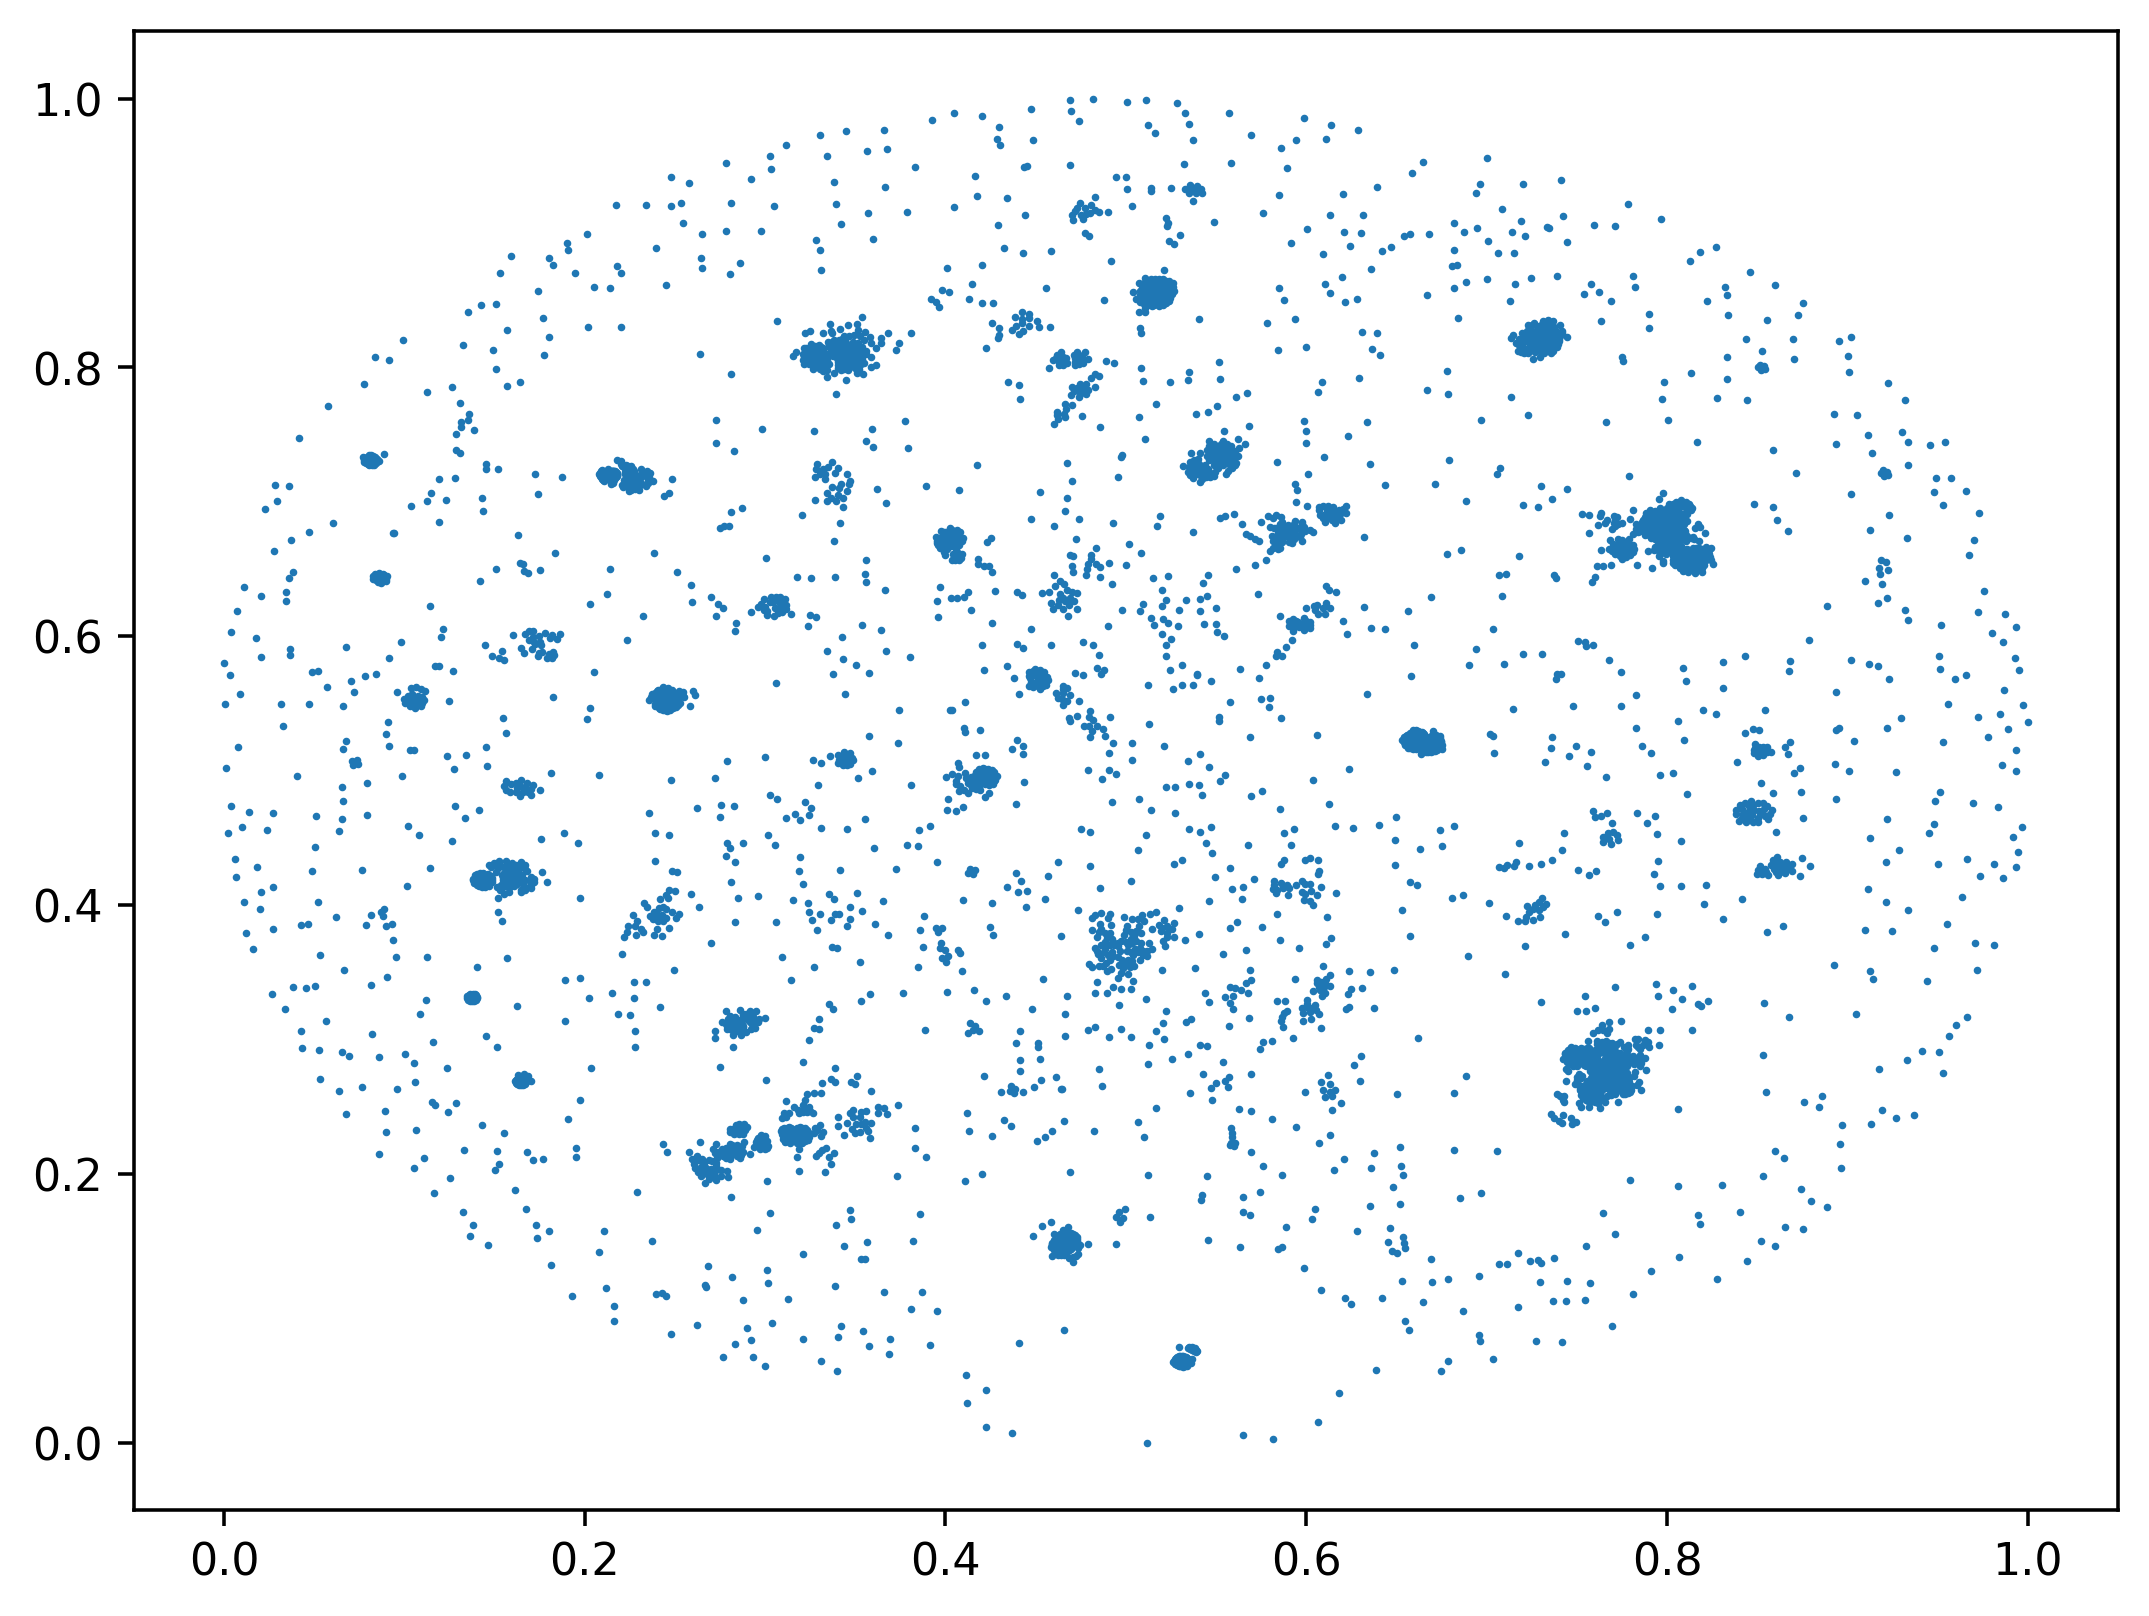

In [31]:
plt.figure(figsize=(8, 6), dpi=320)  # Adjust values as needed
plt.scatter(x, y, s=0.5)
plt.savefig('/Users/selinturkoglu/PycharmProjects/pa/out/uncolored.png')

In [32]:
X = np.column_stack((x,y))
X

array([[0.21500635, 0.7192839 ],
       [0.4717812 , 0.80436754],
       [0.47144616, 0.8094706 ],
       ...,
       [0.00360654, 0.60292846],
       [0.04896818, 0.42510992],
       [0.98656094, 0.59604555]])

In [33]:
clustering = DBSCAN(eps=0.02, min_samples=25).fit(X)
labels = clustering.labels_
len(set(labels))

35

In [34]:
clustered_set = pd.DataFrame(labels, columns=['cluster_labels'])
clustered_set = pd.concat([scatter,clustered_set], axis=1)
clustered_set

,ID,NAME,X,Y,cluster_labels
0,0,sp|A0A0B4U9L8|VMF1_VIPAA Zinc metalloproteinas...,0.215006,0.719284,0
1,1,sp|A0A0B5A8P4|INS3A_CONGE Con-Ins G3 OS=Conus ...,0.471781,0.804368,1
2,2,sp|A0A0B5AC95|INS1A_CONGE Con-Ins G1a OS=Conus...,0.471446,0.809471,1
3,3,sp|A0A0D4WV12|BIB11_SICTE Dermonecrotic toxin ...,0.082629,0.644929,2
4,4,sp|A0A0N7CSQ4|TX41A_SCOMU Tau-scoloptoxin(04)-...,0.123150,0.701138,-1
...,...,...,...,...,...
5250,5250,sp|P0CI16|TE61_HASHE Augerpeptide hhe6.1 OS=Ha...,0.945380,0.453934,-1
5251,5251,sp|P0CI17|TE62_HASHE Augerpeptide hhe6.2 OS=Ha...,0.422708,0.038988,-1
5252,5252,sp|P0CI18|TE63_HASHE Augerpeptide hhe6.3 OS=Ha...,0.003607,0.602928,-1
5253,5253,sp|P0CI19|TE64_HASHE Augerpeptide hhe6.4 OS=Ha...,0.048968,0.425110,-1


## HDBSCAN

In [35]:
from sklearn.cluster import HDBSCAN
hdb_clustering = HDBSCAN(min_cluster_size=25).fit(X)
hdb_labels = hdb_clustering.labels_
len(set(hdb_labels))

36

In [36]:
hdb_clustered_set = pd.DataFrame(hdb_labels, columns=['cluster_labels'])
hdb_clustered_set = pd.concat([scatter,hdb_clustered_set], axis=1)
hdb_clustered_set

,ID,NAME,X,Y,cluster_labels
0,0,sp|A0A0B4U9L8|VMF1_VIPAA Zinc metalloproteinas...,0.215006,0.719284,7
1,1,sp|A0A0B5A8P4|INS3A_CONGE Con-Ins G3 OS=Conus ...,0.471781,0.804368,29
2,2,sp|A0A0B5AC95|INS1A_CONGE Con-Ins G1a OS=Conus...,0.471446,0.809471,29
3,3,sp|A0A0D4WV12|BIB11_SICTE Dermonecrotic toxin ...,0.082629,0.644929,10
4,4,sp|A0A0N7CSQ4|TX41A_SCOMU Tau-scoloptoxin(04)-...,0.123150,0.701138,-1
...,...,...,...,...,...
5250,5250,sp|P0CI16|TE61_HASHE Augerpeptide hhe6.1 OS=Ha...,0.945380,0.453934,-1
5251,5251,sp|P0CI17|TE62_HASHE Augerpeptide hhe6.2 OS=Ha...,0.422708,0.038988,-1
5252,5252,sp|P0CI18|TE63_HASHE Augerpeptide hhe6.3 OS=Ha...,0.003607,0.602928,-1
5253,5253,sp|P0CI19|TE64_HASHE Augerpeptide hhe6.4 OS=Ha...,0.048968,0.425110,-1


In [37]:
# look at differences
merged = clustered_set.merge(hdb_clustered_set, on=['NAME', 'X', 'Y', 'ID'], suffixes=('_dbscan', '_hdbscan'))
merged

,ID,NAME,X,Y,cluster_labels_dbscan,cluster_labels_hdbscan
0,0,sp|A0A0B4U9L8|VMF1_VIPAA Zinc metalloproteinas...,0.215006,0.719284,0,7
1,1,sp|A0A0B5A8P4|INS3A_CONGE Con-Ins G3 OS=Conus ...,0.471781,0.804368,1,29
2,2,sp|A0A0B5AC95|INS1A_CONGE Con-Ins G1a OS=Conus...,0.471446,0.809471,1,29
3,3,sp|A0A0D4WV12|BIB11_SICTE Dermonecrotic toxin ...,0.082629,0.644929,2,10
4,4,sp|A0A0N7CSQ4|TX41A_SCOMU Tau-scoloptoxin(04)-...,0.123150,0.701138,-1,-1
...,...,...,...,...,...,...
5250,5250,sp|P0CI16|TE61_HASHE Augerpeptide hhe6.1 OS=Ha...,0.945380,0.453934,-1,-1
5251,5251,sp|P0CI17|TE62_HASHE Augerpeptide hhe6.2 OS=Ha...,0.422708,0.038988,-1,-1
5252,5252,sp|P0CI18|TE63_HASHE Augerpeptide hhe6.3 OS=Ha...,0.003607,0.602928,-1,-1
5253,5253,sp|P0CI19|TE64_HASHE Augerpeptide hhe6.4 OS=Ha...,0.048968,0.425110,-1,-1


In [38]:
diff = merged[merged['cluster_labels_dbscan'] != merged['cluster_labels_hdbscan']]
diff

,ID,NAME,X,Y,cluster_labels_dbscan,cluster_labels_hdbscan
0,0,sp|A0A0B4U9L8|VMF1_VIPAA Zinc metalloproteinas...,0.215006,0.719284,0,7
1,1,sp|A0A0B5A8P4|INS3A_CONGE Con-Ins G3 OS=Conus ...,0.471781,0.804368,1,29
2,2,sp|A0A0B5AC95|INS1A_CONGE Con-Ins G1a OS=Conus...,0.471446,0.809471,1,29
3,3,sp|A0A0D4WV12|BIB11_SICTE Dermonecrotic toxin ...,0.082629,0.644929,2,10
5,5,sp|A0A0S4FKT4|VSP1_CRODO Thrombin-like enzyme ...,0.531002,0.064679,3,0
...,...,...,...,...,...,...
5237,5237,sp|W4VSI6|TX21I_TRILK Toxin ICK-18 OS=Trittame...,0.467826,0.615029,32,34
5238,5238,sp|W4VSI7|TX21D_TRILK Toxin ICK-13 OS=Trittame...,0.466478,0.626022,32,34
5239,5239,sp|W4VSI8|ICK8_TRILK Toxin ICK-8 OS=Trittame l...,0.182032,0.601161,30,12
5240,5240,sp|W4VSI9|ICK3_TRILK U10-barytoxin-Tl1a OS=Tri...,0.273593,0.216635,7,15


In [39]:
def plot_clusters(clustering, rainbow):
    unique_labels = sorted(merged[f'cluster_labels_{clustering}'].unique().tolist())
    
    plt.figure(figsize=(8, 6), dpi=250) 
    non_noise_labels = [label for label in unique_labels if label != -1]
    cmap = plt.get_cmap(f'{rainbow}', len(non_noise_labels))
    
    color_map = {label: cmap(i) for i, label in enumerate(non_noise_labels)}
    color_map[-1] = 'black' 
    
    for label in unique_labels:
        cluster_data = merged[merged[f'cluster_labels_{clustering}'] == label]
        plt.scatter(cluster_data['X'], cluster_data['Y'], s=0.5, label=label, color=color_map[label])
    
    plt.legend(fontsize='5.5', bbox_to_anchor=(1.15, 1), ncol=2, markerscale=5)
    plt.title(f'{clustering} Clustering Scatter plot for CLANS ')
    plt.savefig(f'/Users/selinturkoglu/PycharmProjects/pa/out/clustered_{clustering}_{rainbow}.png', dpi=250, bbox_inches='tight')
    plt.show()

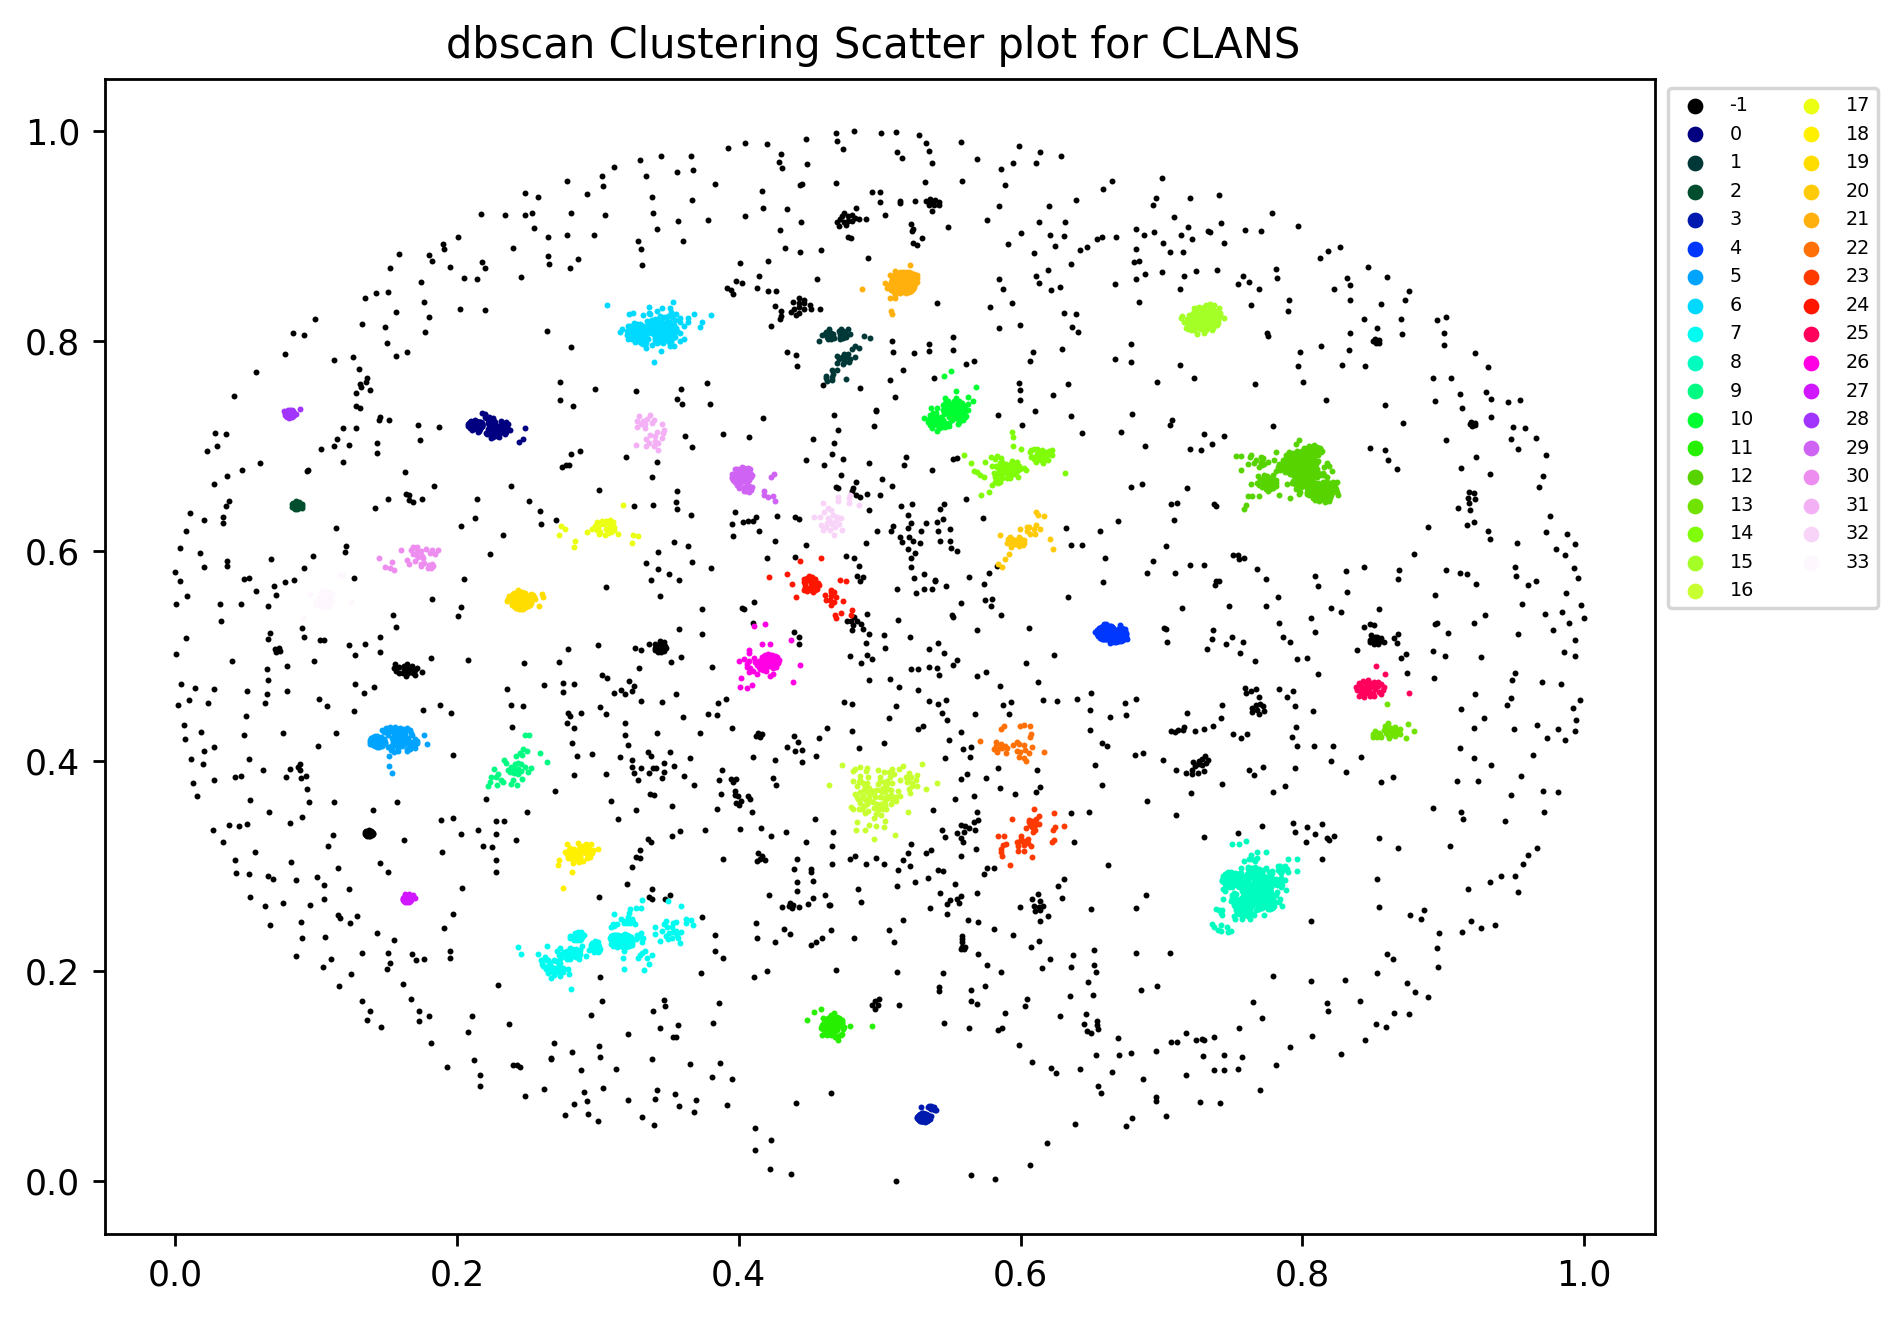

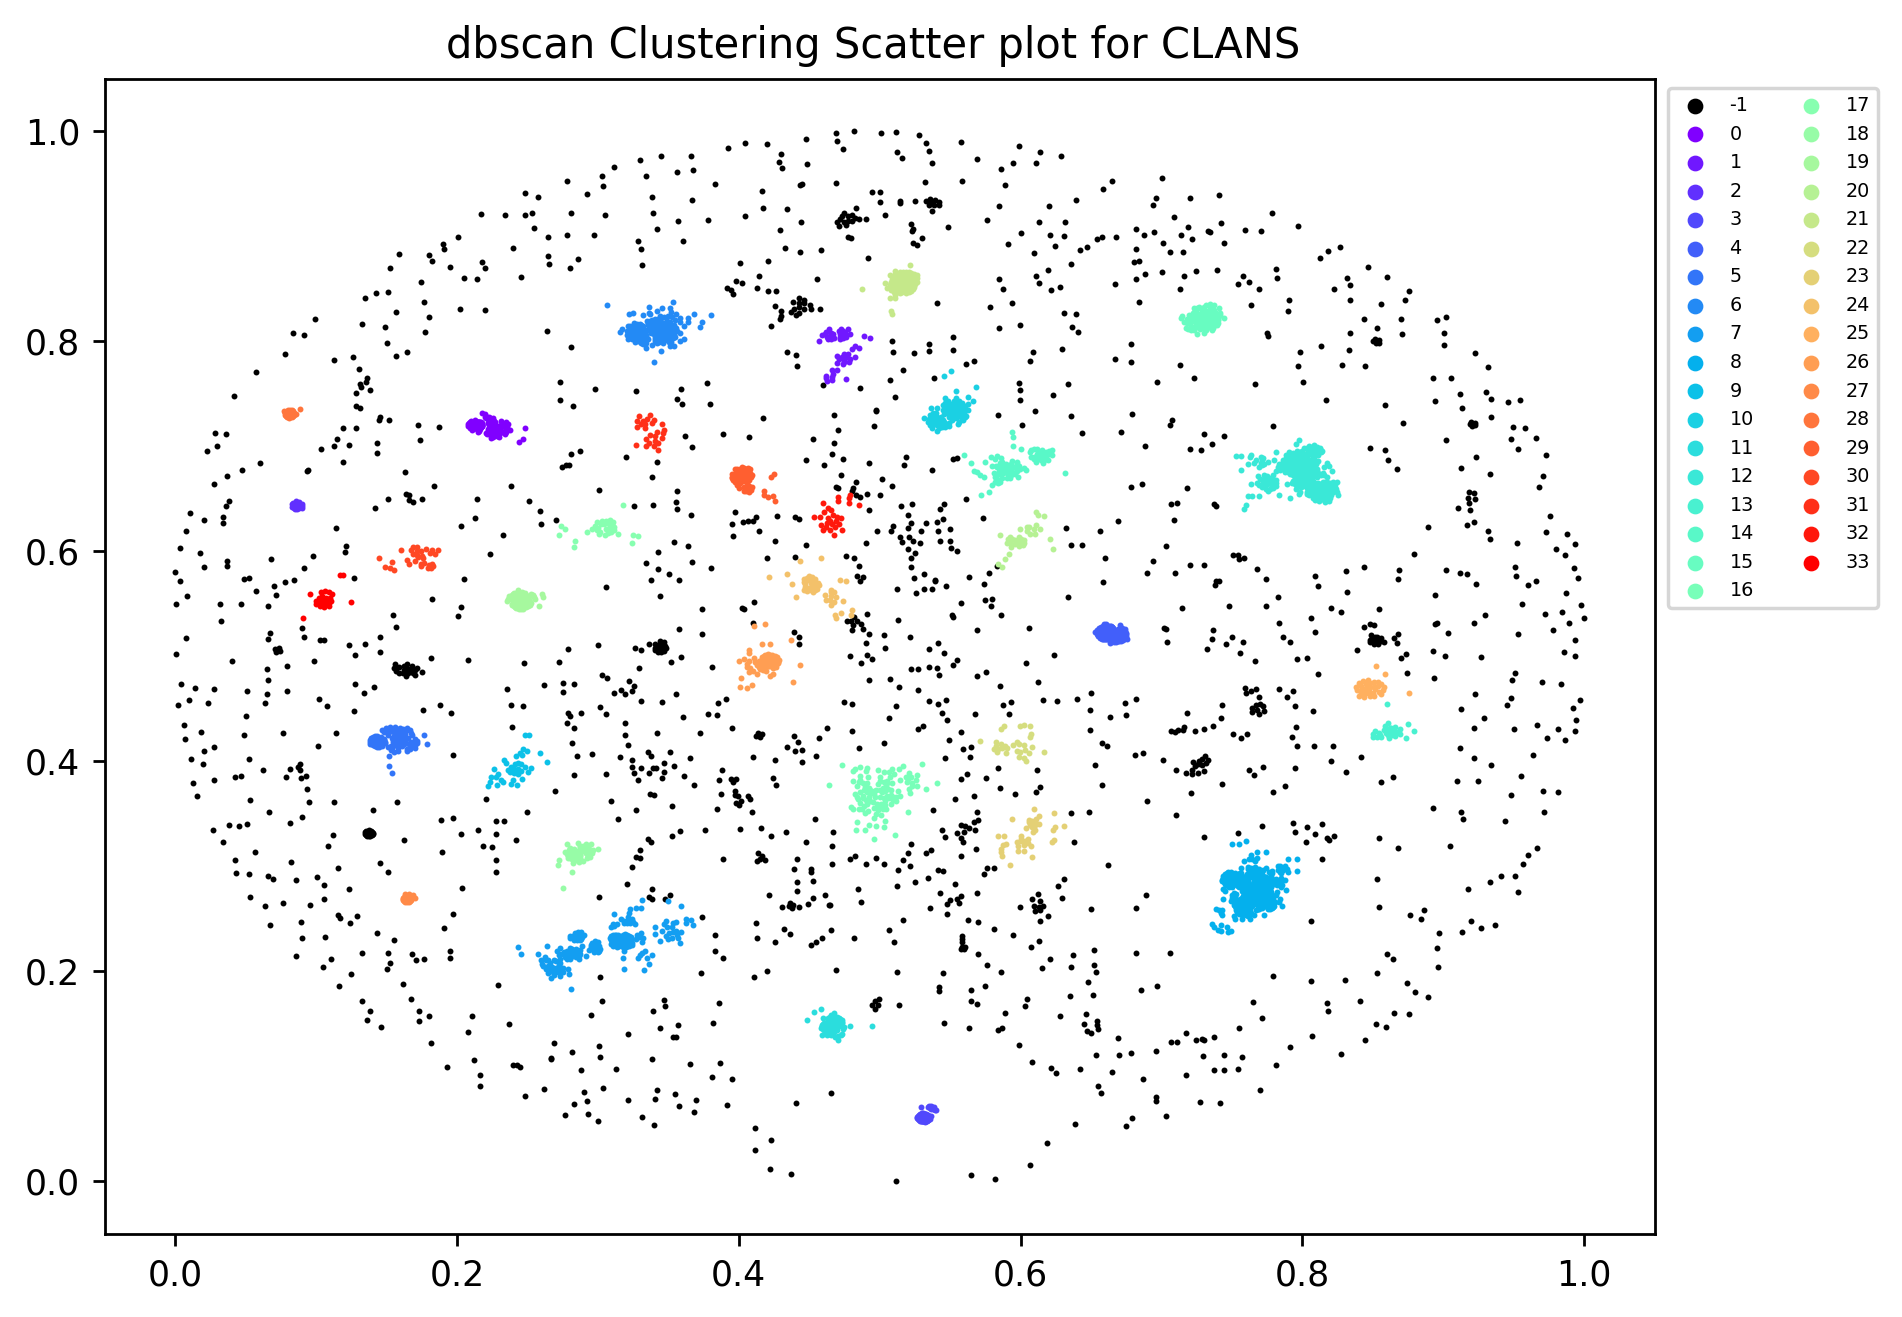

In [40]:
plot_clusters('dbscan', 'gist_ncar')
plot_clusters('dbscan', 'rainbow')

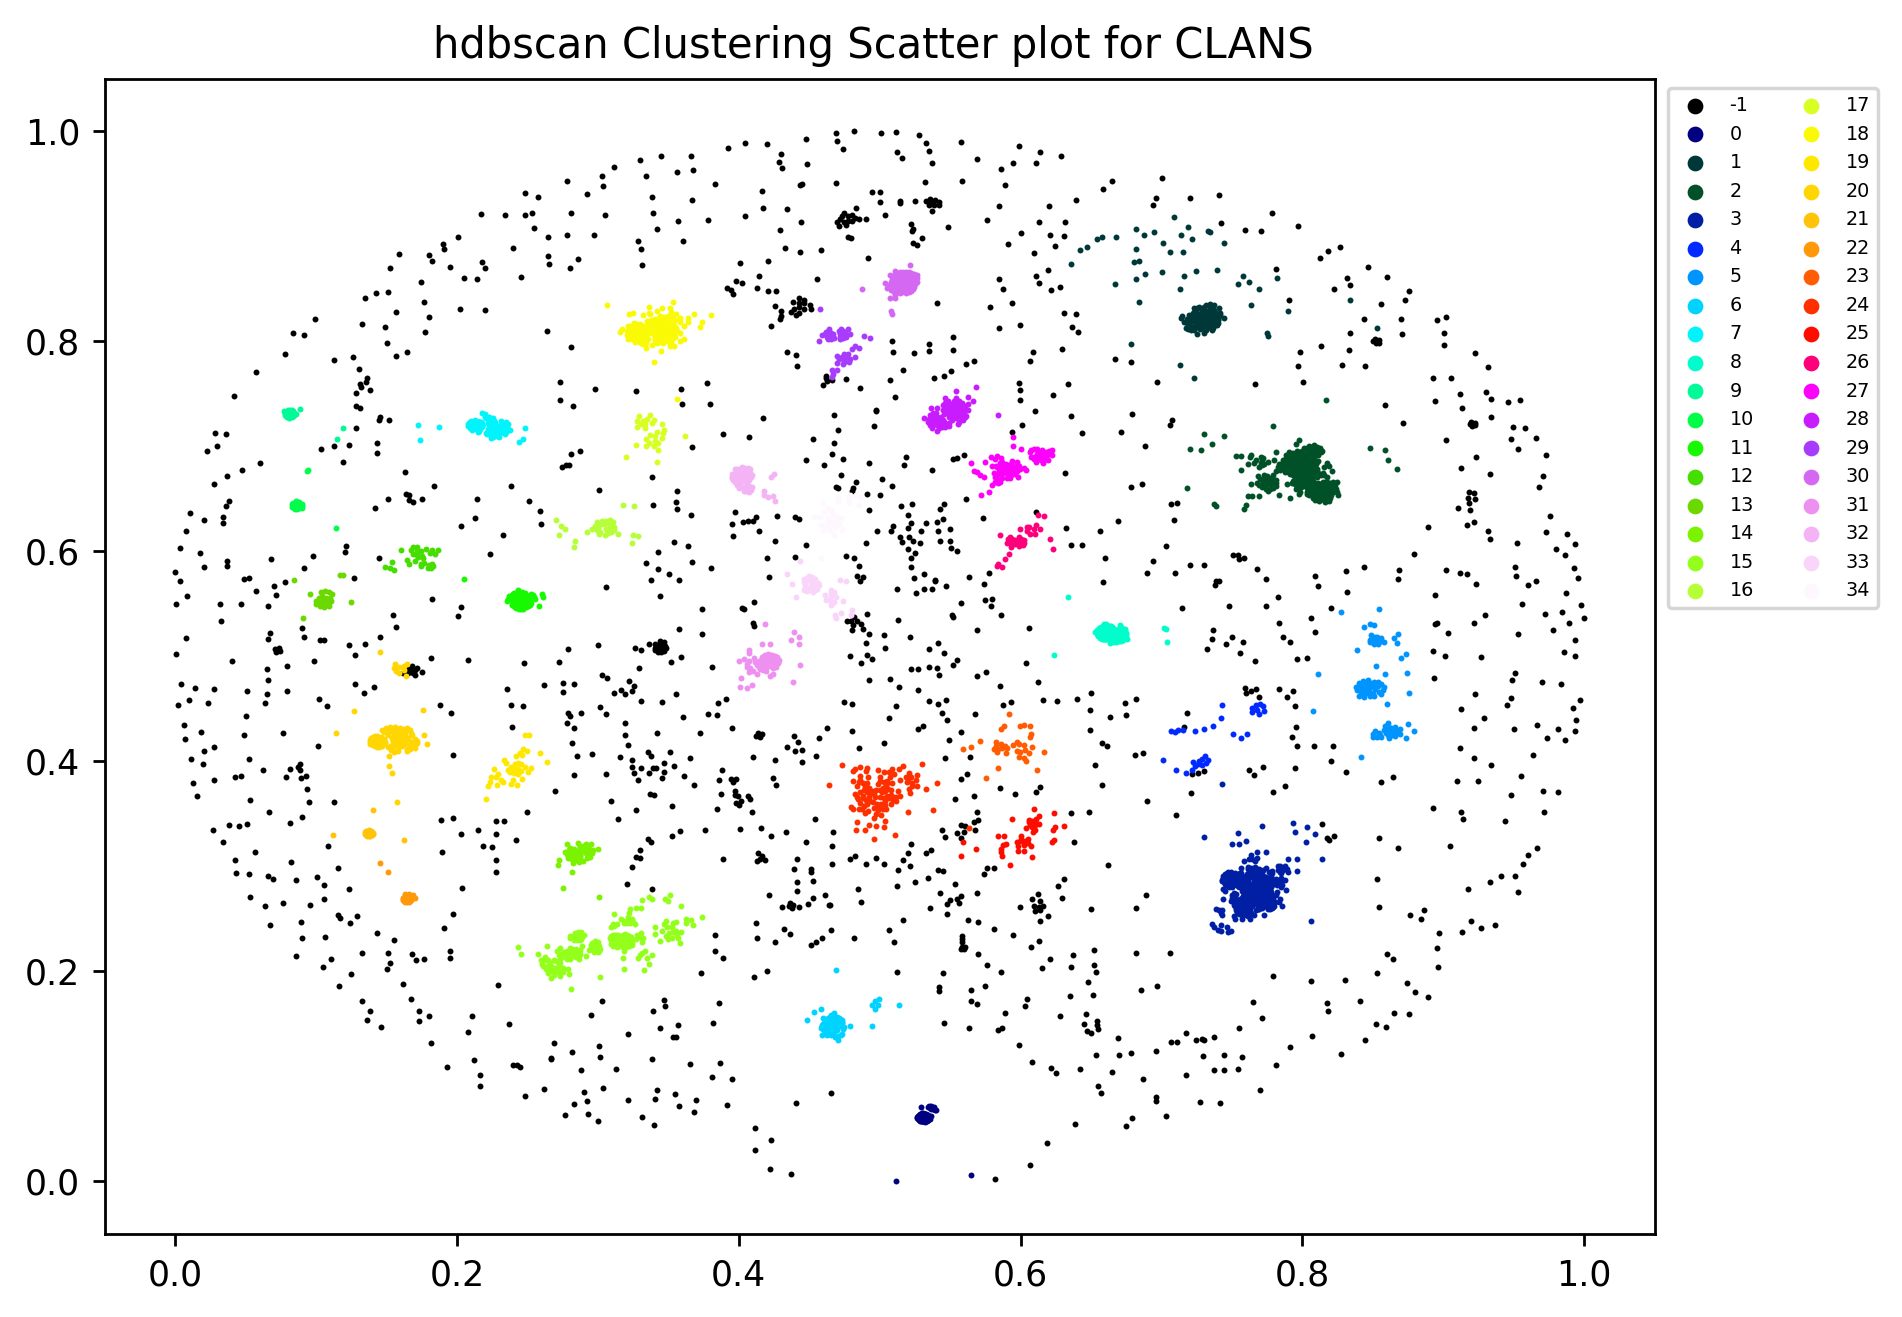

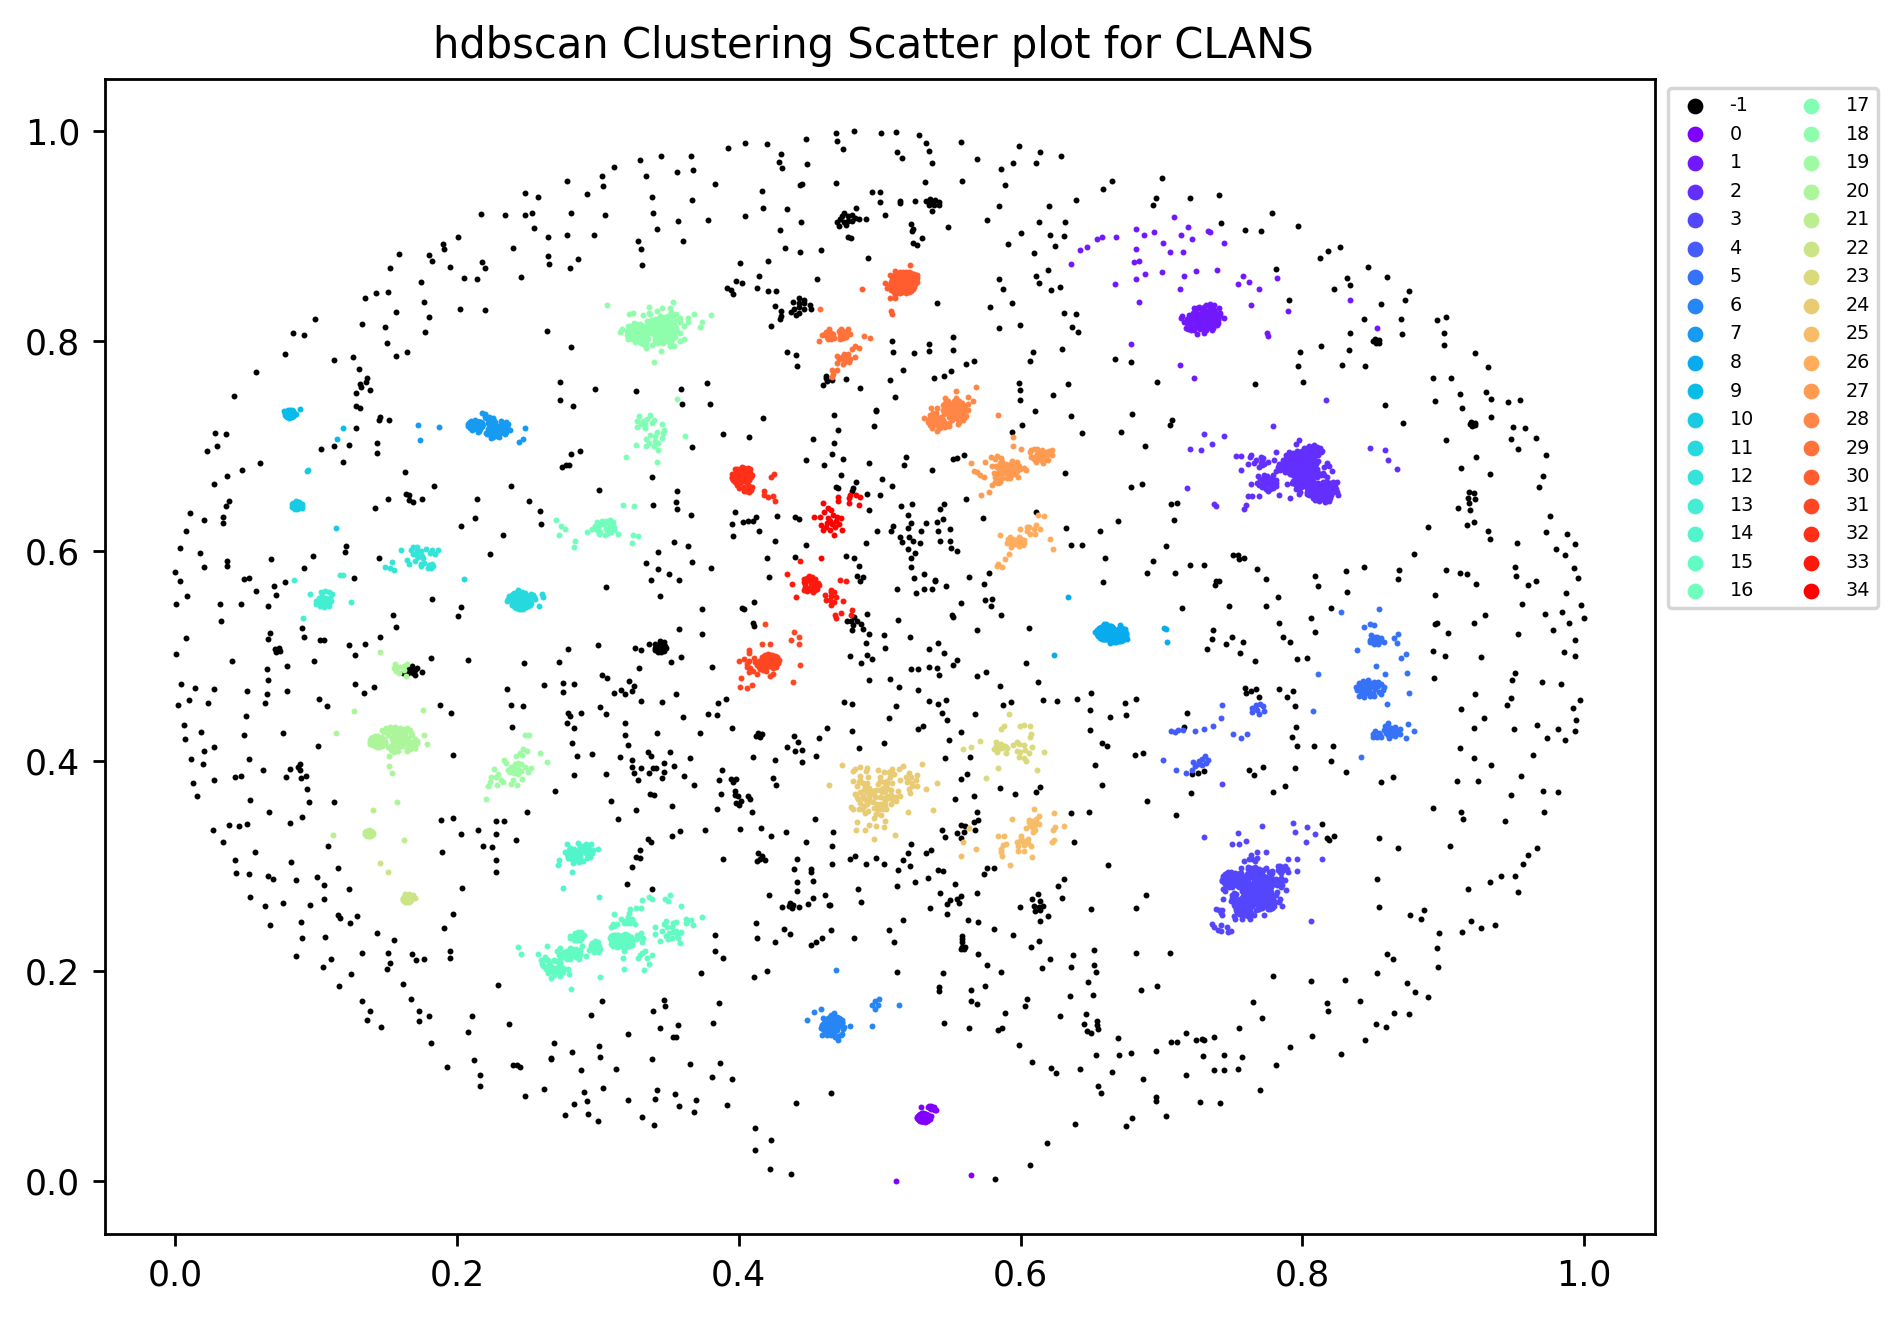

In [41]:
plot_clusters('hdbscan', 'gist_ncar')
plot_clusters('hdbscan', 'rainbow')

In [42]:
clustered_set.rename(columns={'NAME':'Entry'}, inplace=True)
clustered_set

,ID,Entry,X,Y,cluster_labels
0,0,sp|A0A0B4U9L8|VMF1_VIPAA Zinc metalloproteinas...,0.215006,0.719284,0
1,1,sp|A0A0B5A8P4|INS3A_CONGE Con-Ins G3 OS=Conus ...,0.471781,0.804368,1
2,2,sp|A0A0B5AC95|INS1A_CONGE Con-Ins G1a OS=Conus...,0.471446,0.809471,1
3,3,sp|A0A0D4WV12|BIB11_SICTE Dermonecrotic toxin ...,0.082629,0.644929,2
4,4,sp|A0A0N7CSQ4|TX41A_SCOMU Tau-scoloptoxin(04)-...,0.123150,0.701138,-1
...,...,...,...,...,...
5250,5250,sp|P0CI16|TE61_HASHE Augerpeptide hhe6.1 OS=Ha...,0.945380,0.453934,-1
5251,5251,sp|P0CI17|TE62_HASHE Augerpeptide hhe6.2 OS=Ha...,0.422708,0.038988,-1
5252,5252,sp|P0CI18|TE63_HASHE Augerpeptide hhe6.3 OS=Ha...,0.003607,0.602928,-1
5253,5253,sp|P0CI19|TE64_HASHE Augerpeptide hhe6.4 OS=Ha...,0.048968,0.425110,-1


In [43]:
split_columns = clustered_set['Entry'].str.split('|', expand=True)
split_columns.rename(columns={1:'Entry'}, inplace=True)
split_columns

,0,Entry,2
0,sp,A0A0B4U9L8,VMF1_VIPAA Zinc metalloproteinase-disintegrin-...
1,sp,A0A0B5A8P4,INS3A_CONGE Con-Ins G3 OS=Conus geographus OX=...
2,sp,A0A0B5AC95,INS1A_CONGE Con-Ins G1a OS=Conus geographus OX...
3,sp,A0A0D4WV12,BIB11_SICTE Dermonecrotic toxin StSicTox-betaI...
4,sp,A0A0N7CSQ4,TX41A_SCOMU Tau-scoloptoxin(04)-Sm1b OS=Scolop...
...,...,...,...
5250,sp,P0CI16,TE61_HASHE Augerpeptide hhe6.1 OS=Hastula hect...
5251,sp,P0CI17,TE62_HASHE Augerpeptide hhe6.2 OS=Hastula hect...
5252,sp,P0CI18,TE63_HASHE Augerpeptide hhe6.3 OS=Hastula hect...
5253,sp,P0CI19,TE64_HASHE Augerpeptide hhe6.4 OS=Hastula hect...


In [44]:
clustered_set['Entry'] = split_columns['Entry']
clustered_set.drop(columns=['ID'], inplace=True)
clustered_set

,Entry,X,Y,cluster_labels
0,A0A0B4U9L8,0.215006,0.719284,0
1,A0A0B5A8P4,0.471781,0.804368,1
2,A0A0B5AC95,0.471446,0.809471,1
3,A0A0D4WV12,0.082629,0.644929,2
4,A0A0N7CSQ4,0.123150,0.701138,-1
...,...,...,...,...
5250,P0CI16,0.945380,0.453934,-1
5251,P0CI17,0.422708,0.038988,-1
5252,P0CI18,0.003607,0.602928,-1
5253,P0CI19,0.048968,0.425110,-1


In [45]:
merged_with_cluster_annot_df = pd.merge(df, clustered_set, on='Entry', how='inner')
merged_with_cluster_annot_df

,Entry,Entry Name,Protein names,Gene Names,Organism,Domain [FT],Protein families,Sequence similarities,Sequence,X,Y,cluster_labels
0,A0A0B4U9L8,VMF1_VIPAA,Zinc metalloproteinase-disintegrin-like protei...,NaN,Vipera ammodytes ammodytes (Western sand viper),"DOMAIN 202..398; /note=""Peptidase M12B""; /evid...","Venom metalloproteinase (M12B) family, P-III s...",SIMILARITY: Belongs to the venom metalloprotei...,MLQVLLVTICLAVFPYQGSSIILESGNVNDYEVVYPQKLTALLKGA...,0.215006,0.719284,0
1,A0A0B5A8P4,INS3A_CONGE,Con-Ins G3 (Insulin 3) [Cleaved into: Con-Ins ...,NaN,Conus geographus (Geography cone) (Nubecula ge...,NaN,Insulin family,SIMILARITY: Belongs to the insulin family.,MTTSFYFLLVALGLLLYVCQSSFGNQHTRNSDTPKHRCGSELADQY...,0.471781,0.804368,1
2,A0A0B5AC95,INS1A_CONGE,Con-Ins G1a (Insulin 1) [Cleaved into: Con-Ins...,NaN,Conus geographus (Geography cone) (Nubecula ge...,NaN,Insulin family,SIMILARITY: Belongs to the insulin family. {EC...,MTTSSYFLLMALGLLLYVCQSSFGNQHTRTFDTPKHRCGSEITNSY...,0.471446,0.809471,1
3,A0A0D4WV12,BIB11_SICTE,Dermonecrotic toxin StSicTox-betaIB1i (EC 4.6....,NaN,Sicarius terrosus (Cave spider),NaN,"Arthropod phospholipase D family, Class II sub...",SIMILARITY: Belongs to the arthropod phospholi...,GDSRRPIWNIAHMVNDLDLVDEYLDDGANSLELDVEFSKSGTALRT...,0.082629,0.644929,2
4,A0A0N7CSQ4,TX41A_SCOMU,Tau-scoloptoxin(04)-Sm1b (Tau-SLPTX(04)-Sm1b) ...,NaN,Scolopendra mutilans (Chinese red-headed centi...,NaN,Scoloptoxin-04 family,SIMILARITY: Belongs to the scoloptoxin-04 fami...,MLKSFCILSVFMVLFLAKFPDLCSGEEISPLKIVVRNSEYLNNPCN...,0.123150,0.701138,-1
...,...,...,...,...,...,...,...,...,...,...,...,...
5250,P0CI16,TE61_HASHE,Augerpeptide hhe6.1,NaN,Hastula hectica (Sea snail) (Impages hectica),NaN,NaN,NaN,GMGIGINLPPCIKNGEYCNPWTGSIILGGACCGTCTDYECH,0.945380,0.453934,-1
5251,P0CI17,TE62_HASHE,Augerpeptide hhe6.2,NaN,Hastula hectica (Sea snail) (Impages hectica),NaN,NaN,NaN,ALPCPYGCPLRCCHMTDGVCLRNKQGC,0.422708,0.038988,-1
5252,P0CI18,TE63_HASHE,Augerpeptide hhe6.3,NaN,Hastula hectica (Sea snail) (Impages hectica),NaN,NaN,NaN,VLFTPPELLGCGNRCSDDCCKWGRCQPGCTD,0.003607,0.602928,-1
5253,P0CI19,TE64_HASHE,Augerpeptide hhe6.4,NaN,Hastula hectica (Sea snail) (Impages hectica),NaN,NaN,NaN,SSLHCGDDPWCPTGCCENEDCDIGCKRDWEKSRSQP,0.048968,0.425110,-1


In [46]:
merged_with_cluster_annot_df['cluster_labels'].value_counts()

cluster_labels
-1     1671
 8      463
 12     354
 4      280
 7      255
 0      209
 6      206
 3      150
 19     145
 11     122
 5      116
 16     116
 15      96
 10      96
 26      93
 18      91
 21      86
 14      86
 29      67
 1       51
 24      48
 23      42
 9       40
 28      38
 20      36
 27      34
 17      33
 25      32
 30      32
 22      31
 13      29
 32      28
 33      27
 2       26
 31      26
Name: count, dtype: int64

In [47]:
pfam = pd.read_csv('/Users/selinturkoglu/PycharmProjects/pa/data/pfam.tsv', sep='\t')
pfam

,Entry,Reviewed,Entry Name,Protein names,Gene Names,Organism,Length,Domain [FT],Protein families,Sequence similarities,Pfam,Gene3D
0,A0A0B4U9L8,reviewed,VMF1_VIPAA,Zinc metalloproteinase-disintegrin-like protei...,NaN,Vipera ammodytes ammodytes (Western sand viper),614,"DOMAIN 202..398; /note=""Peptidase M12B""; /evid...","Venom metalloproteinase (M12B) family, P-III s...",SIMILARITY: Belongs to the venom metalloprotei...,PF08516;PF00200;PF01562;PF01421;,3.40.390.10;4.10.70.10;
1,A0A0B5A8P4,reviewed,INS3A_CONGE,Con-Ins G3 (Insulin 3) [Cleaved into: Con-Ins ...,NaN,Conus geographus (Geography cone) (Nubecula ge...,113,NaN,Insulin family,SIMILARITY: Belongs to the insulin family.,PF00049;,1.10.100.10;
2,A0A0B5AC95,reviewed,INS1A_CONGE,Con-Ins G1a (Insulin 1) [Cleaved into: Con-Ins...,NaN,Conus geographus (Geography cone) (Nubecula ge...,115,NaN,Insulin family,SIMILARITY: Belongs to the insulin family. {EC...,PF00049;,1.10.100.10;
3,A0A0D4WV12,reviewed,BIB11_SICTE,Dermonecrotic toxin StSicTox-betaIB1i (EC 4.6....,NaN,Sicarius terrosus (Cave spider),279,NaN,"Arthropod phospholipase D family, Class II sub...",SIMILARITY: Belongs to the arthropod phospholi...,PF13653;,3.20.20.190;
4,A0A0N7CSQ4,reviewed,TX41A_SCOMU,Tau-scoloptoxin(04)-Sm1b (Tau-SLPTX(04)-Sm1b) ...,NaN,Scolopendra mutilans (Chinese red-headed centi...,68,NaN,Scoloptoxin-04 family,SIMILARITY: Belongs to the scoloptoxin-04 fami...,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
5250,P0CI16,reviewed,TE61_HASHE,Augerpeptide hhe6.1,NaN,Hastula hectica (Sea snail) (Impages hectica),41,NaN,NaN,NaN,NaN,NaN
5251,P0CI17,reviewed,TE62_HASHE,Augerpeptide hhe6.2,NaN,Hastula hectica (Sea snail) (Impages hectica),27,NaN,NaN,NaN,NaN,NaN
5252,P0CI18,reviewed,TE63_HASHE,Augerpeptide hhe6.3,NaN,Hastula hectica (Sea snail) (Impages hectica),31,NaN,NaN,NaN,NaN,NaN
5253,P0CI19,reviewed,TE64_HASHE,Augerpeptide hhe6.4,NaN,Hastula hectica (Sea snail) (Impages hectica),36,NaN,NaN,NaN,NaN,NaN


In [48]:
merged_with_cluster_annot_df['Pfam'] = pfam['Pfam'].values
merged_with_cluster_annot_df['Gene3D'] = pfam['Gene3D'].values
merged_with_cluster_annot_df.to_json('/Users/selinturkoglu/PycharmProjects/pa/out/5255_toxins.json')
merged_with_cluster_annot_df

,Entry,Entry Name,Protein names,Gene Names,Organism,Domain [FT],Protein families,Sequence similarities,Sequence,X,Y,cluster_labels,Pfam,Gene3D
0,A0A0B4U9L8,VMF1_VIPAA,Zinc metalloproteinase-disintegrin-like protei...,NaN,Vipera ammodytes ammodytes (Western sand viper),"DOMAIN 202..398; /note=""Peptidase M12B""; /evid...","Venom metalloproteinase (M12B) family, P-III s...",SIMILARITY: Belongs to the venom metalloprotei...,MLQVLLVTICLAVFPYQGSSIILESGNVNDYEVVYPQKLTALLKGA...,0.215006,0.719284,0,PF08516;PF00200;PF01562;PF01421;,3.40.390.10;4.10.70.10;
1,A0A0B5A8P4,INS3A_CONGE,Con-Ins G3 (Insulin 3) [Cleaved into: Con-Ins ...,NaN,Conus geographus (Geography cone) (Nubecula ge...,NaN,Insulin family,SIMILARITY: Belongs to the insulin family.,MTTSFYFLLVALGLLLYVCQSSFGNQHTRNSDTPKHRCGSELADQY...,0.471781,0.804368,1,PF00049;,1.10.100.10;
2,A0A0B5AC95,INS1A_CONGE,Con-Ins G1a (Insulin 1) [Cleaved into: Con-Ins...,NaN,Conus geographus (Geography cone) (Nubecula ge...,NaN,Insulin family,SIMILARITY: Belongs to the insulin family. {EC...,MTTSSYFLLMALGLLLYVCQSSFGNQHTRTFDTPKHRCGSEITNSY...,0.471446,0.809471,1,PF00049;,1.10.100.10;
3,A0A0D4WV12,BIB11_SICTE,Dermonecrotic toxin StSicTox-betaIB1i (EC 4.6....,NaN,Sicarius terrosus (Cave spider),NaN,"Arthropod phospholipase D family, Class II sub...",SIMILARITY: Belongs to the arthropod phospholi...,GDSRRPIWNIAHMVNDLDLVDEYLDDGANSLELDVEFSKSGTALRT...,0.082629,0.644929,2,PF13653;,3.20.20.190;
4,A0A0N7CSQ4,TX41A_SCOMU,Tau-scoloptoxin(04)-Sm1b (Tau-SLPTX(04)-Sm1b) ...,NaN,Scolopendra mutilans (Chinese red-headed centi...,NaN,Scoloptoxin-04 family,SIMILARITY: Belongs to the scoloptoxin-04 fami...,MLKSFCILSVFMVLFLAKFPDLCSGEEISPLKIVVRNSEYLNNPCN...,0.123150,0.701138,-1,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5250,P0CI16,TE61_HASHE,Augerpeptide hhe6.1,NaN,Hastula hectica (Sea snail) (Impages hectica),NaN,NaN,NaN,GMGIGINLPPCIKNGEYCNPWTGSIILGGACCGTCTDYECH,0.945380,0.453934,-1,NaN,NaN
5251,P0CI17,TE62_HASHE,Augerpeptide hhe6.2,NaN,Hastula hectica (Sea snail) (Impages hectica),NaN,NaN,NaN,ALPCPYGCPLRCCHMTDGVCLRNKQGC,0.422708,0.038988,-1,NaN,NaN
5252,P0CI18,TE63_HASHE,Augerpeptide hhe6.3,NaN,Hastula hectica (Sea snail) (Impages hectica),NaN,NaN,NaN,VLFTPPELLGCGNRCSDDCCKWGRCQPGCTD,0.003607,0.602928,-1,NaN,NaN
5253,P0CI19,TE64_HASHE,Augerpeptide hhe6.4,NaN,Hastula hectica (Sea snail) (Impages hectica),NaN,NaN,NaN,SSLHCGDDPWCPTGCCENEDCDIGCKRDWEKSRSQP,0.048968,0.425110,-1,NaN,NaN
